# Artificial Neural Networks and Deep Learning

---

## Homework 1: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.
2. Upload the `training_set.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

%cd /gdrive/My Drive/[2024-2025]AN2DL

Mounted at /gdrive
/gdrive/My Drive/[2024-2025]AN2DL


## ⚙️ Import Libraries

In [ ]:
import numpy as np


import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam, Lion
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE



from tensorflow.keras import mixed_precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')


import random
import matplotlib.pyplot as plt

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)




## ⏳ Load the Data

In [ ]:
data = np.load('training_set_cleaned.npz')
X = data['images']
y = data['labels']

print(X.shape)
print(y.shape)

# Define a mapping of labels to their corresponding digit names
labels = {0:'Basophil', 1:'Eosinophil', 2:'Erythroblast', 3:'Immature granulocytes', 4:'Lymphocyte', 5:'Monocyte', 6:'Neutrophil', 7:'Platelet'}

# Save unique labels
unique_labels = list(labels.values())
print(unique_labels)

(11951, 96, 96, 3)
(11951, 1)
['Basophil', 'Eosinophil', 'Erythroblast', 'Immature granulocytes', 'Lymphocyte', 'Monocyte', 'Neutrophil', 'Platelet']


Inspect data

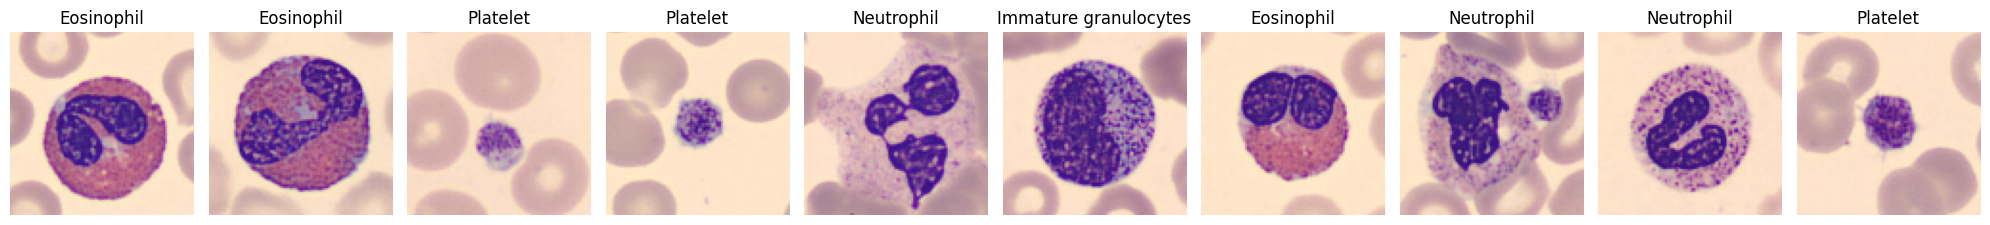

In [ ]:
# Display a sample of images from the training-validation dataset
num_img = 10
random_indices = random.sample(range(len(X)), num_img)

fig, axes = plt.subplots(1, num_img, figsize=(20, 20))

# Iterate through the selected number of images
for i, idx in enumerate(random_indices):
    ax = axes[i % num_img]
    ax.imshow(np.squeeze(X[idx]), vmin=0., vmax=1.)
    ax.set_title(f'{labels[y[idx][0]]}')
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

Split data

In [ ]:


# Dividi il dataset in training + validation set e test set

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

# Dividi il training + validation set in training e validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, stratify=y_train_val, random_state=42
)

# Stampa le dimensioni per confermare la suddivisione
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (9560, 96, 96, 3) (9560, 1)
Validation set: (1195, 96, 96, 3) (1195, 1)
Test set: (1196, 96, 96, 3) (1196, 1)


Normalizzo

In [ ]:


y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)
y_val = tfk.utils.to_categorical(y_val)

# Stampa per confermare la forma
print("Training Data Shape:", X_train.shape)
print("Training Label Shape:", y_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Validation Label Shape:", y_val.shape)

Training Data Shape: (9560, 96, 96, 3)
Training Label Shape: (9560, 8)
Validation Data Shape: (1195, 96, 96, 3)
Validation Label Shape: (1195, 8)


In [ ]:
# Input shape for the model
input_shape = X_train.shape[1:]

# Output shape for the model
output_shape = y_train.shape[1]

print("Input Shape:", input_shape)
print("Output Shape:", output_shape)

Input Shape: (96, 96, 3)
Output Shape: 8


In [ ]:
# Number of training epochs
epochs = 100

# Batch size for training
batch_size = 32

# Learning rate: step size for updating the model's weights
learning_rate = 0.001

# Print the defined parameters
print("Epochs:", epochs)
print("Batch Size:", batch_size)
print("Learning Rare:", learning_rate)

Epochs: 100
Batch Size: 32
Learning Rare: 0.001


In [ ]:
# Normalizza i dati per portarli nell'intervallo [0, 1]
X_train = (X_train / 255).astype('float32')
X_test = (X_test / 255).astype('float32')
X_val = (X_val / 255).astype('float32')

Data augmentation

X_train shape: (9560, 96, 96, 3)
random_idx: 860
Image shape: (96, 96, 3)


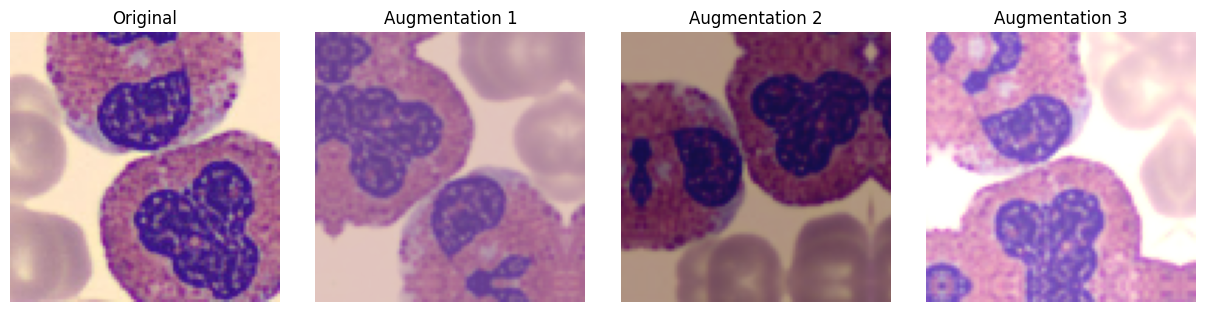

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfkl

# Define a data augmentation pipeline with random flip, brightness, and translation
augmentation = tf.keras.Sequential([
    tfkl.RandomFlip("horizontal_and_vertical"),
    tfkl.RandomRotation(0.3),
    tfkl.RandomZoom(0.2),
    tfkl.RandomBrightness(0.3, value_range=(0,1)),
    tfkl.RandomContrast(0.4)
], name='preprocessing')

# Select a random image from X_train
random_idx = np.random.randint(0, X_train.shape[0])  # Indice casuale
img = X_train[random_idx]

print(f"X_train shape: {X_train.shape}")
print(f"random_idx: {random_idx}")
print(f"Image shape: {img.shape}")

# Set up the figure and grid layout
fig = plt.figure(constrained_layout=True, figsize=(12, 3))
gs = gridspec.GridSpec(1, 4, figure=fig, width_ratios=[1, 1, 1, 1], wspace=0.1)

# Display the original image
ax1 = fig.add_subplot(gs[0])
ax1.imshow(np.squeeze(img))
ax1.axis('off')
ax1.set_title("Original")

# Apply augmentation and display augmented images in separate plots
for i in range(1, 4):
    augmented_img = augmentation(np.expand_dims(img, axis=0))  # Apply augmentation
    augmented_img = augmented_img[0].numpy()  # Convert tensor to numpy array
    augmented_img = np.clip(augmented_img, 0.0, 1.0).astype(np.float32)  # Clip to valid range

    # Display each augmented image in a new subplot
    ax = fig.add_subplot(gs[i])
    ax.imshow(np.squeeze(augmented_img))
    ax.axis('off')
    ax.set_title(f"Augmentation {i}")

# Show the figure with all images
plt.show()





## 🛠️ Train and Save the Model

In [ ]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(96, 96, 3))
base_model.summary


<bound method Model.summary of <Functional name=vgg16, built=True>>

In [ ]:


# Define model
inputs = tfk.Input(shape=(96,96,3))
x = augmentation(inputs)
x = base_model(x)

# Use GlobalAveragePooling2D
x = tfkl.GlobalAveragePooling2D()(x)


print("shape after globpooling", x.shape)

# Add Dropout and Dense layers
x = tfkl.Dropout(0.5, seed=seed)(x)
print("shape after dropout", x.shape)
x = tfkl.Dense(64, kernel_initializer=tfk.initializers.HeUniform(seed), kernel_regularizer=tfk.regularizers.l2(0.01))(x)

x = tfkl.LeakyReLU()(x)
x = tfkl.Dropout(0.5, seed=seed)(x)


# Final output layer
outputs = tfkl.Dense(8, activation='softmax', kernel_initializer=tfk.initializers.GlorotUniform(seed))(x)
print(outputs.shape)

# Connect input and output through the Model class
model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

optimizer = Lion(learning_rate=1e-4, clipnorm=1.0)
loss = tfk.losses.CategoricalCrossentropy(
    label_smoothing=0.1,
    from_logits=False  # Dato che usi softmax nell'ultimo layer
)

# Compile the model
model.compile( loss=loss,
              optimizer=optimizer,
              metrics=['accuracy', tfk.metrics.Precision(), tfk.metrics.Recall()])
model.summary()


shape after globpooling (None, 512)
shape after dropout (None, 512)
(None, 8)


Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ preprocessing (Sequential)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 3, 3, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,748,040 (56.26 MB)

 Trainable params: 14,748,040 (56.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install psutil
import psutil
print(f"Compute dtype: {tf.keras.mixed_precision.global_policy().compute_dtype}")
print(f"Variable dtype: {tf.keras.mixed_precision.global_policy().variable_dtype}")
before_training_memory = psutil.virtual_memory().used

Compute dtype: float16
Variable dtype: float32


In [ ]:
# Define the patience value for early stopping
patience = 10

callbacks = [
    tfk.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        restore_best_weights=True
    ),
    tfk.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
#class_weights = {0: 1.0, 1: 2.0, 2: 0.5, 3: 1.5, 4: 1.0, 5: 1.0, 6: 2.0, 7: 0.5}

# Train the model with early stopping callback
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val,y_val),
    callbacks=callbacks
    #class_weight=class_weights
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'T_model.keras'
model.save(model_filename)

# Delete the model to free up resources
del model

Epoch 1/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.2507 - loss: 3.1692 - precision_5: 0.4634 - recall_5: 0.0676 - val_accuracy: 0.6736 - val_loss: 1.7244 - val_precision_5: 0.9263 - val_recall_5: 0.4837 - learning_rate: 1.0000e-04
Epoch 2/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6796 - loss: 1.6541 - precision_5: 0.8848 - recall_5: 0.4733 - val_accuracy: 0.7615 - val_loss: 1.1207 - val_precision_5: 0.8633 - val_recall_5: 0.6552 - learning_rate: 1.0000e-04
Epoch 3/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7917 - loss: 1.1090 - precision_5: 0.9184 - recall_5: 0.6323 - val_accuracy: 0.7724 - val_loss: 1.0252 - val_precision_5: 0.8119 - val_recall_5: 0.7222 - learning_rate: 1.0000e-04
Epoch 4/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8365 - loss: 0.9147 - precision_5: 0.9092 - recall_5: 0.7156 - val_accuracy: 0.8519 - val_loss: 0.8127 - val_precision_5: 0.8801 - val_recall_5: 0.8167 - learning_rate: 1.0000e-04
Epoch 5

FINE TUNING

In [ ]:
ft_model = tfk.models.load_model('T_model.keras')
ft_model.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ preprocessing (Sequential)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 3, 3, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,496,086 (112.52 MB)

 Trainable params: 14,748,040 (56.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,748,046 (56.26 MB)

In [ ]:
ft_model.get_layer('vgg16').trainable = True
for i, layer in enumerate(ft_model.get_layer('vgg16').layers[:10]):
    layer.trainable = False

for i, layer in enumerate(ft_model.get_layer('vgg16').layers):
    print(i, layer.name, layer.trainable)
ft_model.summary()


0 input_layer_19 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ preprocessing (Sequential)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 3, 3, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,496,086 (112.52 MB)

 Trainable params: 13,012,552 (49.64 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

 Optimizer params: 14,748,046 (56.26 MB)

In [ ]:
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy', tfk.metrics.Precision(), tfk.metrics.Recall()])

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, y_val),
    callbacks = callbacks
).history


# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'FT_model.keras'
ft_model.save(model_filename)

# Delete the model to free up resources
#del model


Epoch 1/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9714 - loss: 0.1705 - precision_4: 0.9784 - recall_4: 0.9666 - val_accuracy: 0.9724 - val_loss: 0.1196 - val_precision_4: 0.9748 - val_recall_4: 0.9707 - learning_rate: 1.0000e-05
Epoch 2/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9793 - loss: 0.1068 - precision_4: 0.9834 - recall_4: 0.9756 - val_accuracy: 0.9741 - val_loss: 0.1193 - val_precision_4: 0.9749 - val_recall_4: 0.9732 - learning_rate: 1.0000e-05
Epoch 3/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9792 - loss: 0.0974 - precision_4: 0.9812 - recall_4: 0.9768 - val_accuracy: 0.9741 - val_loss: 0.1242 - val_precision_4: 0.9749 - val_recall_4: 0.9732 - learning_rate: 1.0000e-05
Epoch 4/100
299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9788 - loss: 0.0930 - precision_4: 0.9825 - recall_4: 0.9774 - val_accuracy: 0.9724 - val_loss: 0.1280 - val_precision_4: 0.9748 - val_recall_4: 0.9715 - learning_rate: 1.0000e-05
Epoch 5/

Analyze results

In [ ]:
loaded_model = tf.keras.models.load_model('FT_model.keras')
print("Model output shape:", loaded_model.output_shape)
print("y_test shape:", y_test.shape)

# Valuta il modello sui dati di test
test_results = loaded_model.evaluate(X_test, y_test, verbose=0)

# Stampa i risultati
test_loss = test_results[0]
test_accuracy = test_results[1]
test_precision = test_results[2]
test_recall = test_results[3]

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')



Model output shape: (None, 8)
y_test shape: (1196, 8)
Test Loss: 0.1031
Test Accuracy: 0.9749
Test Precision: 0.9757
Test Recall: 0.9732


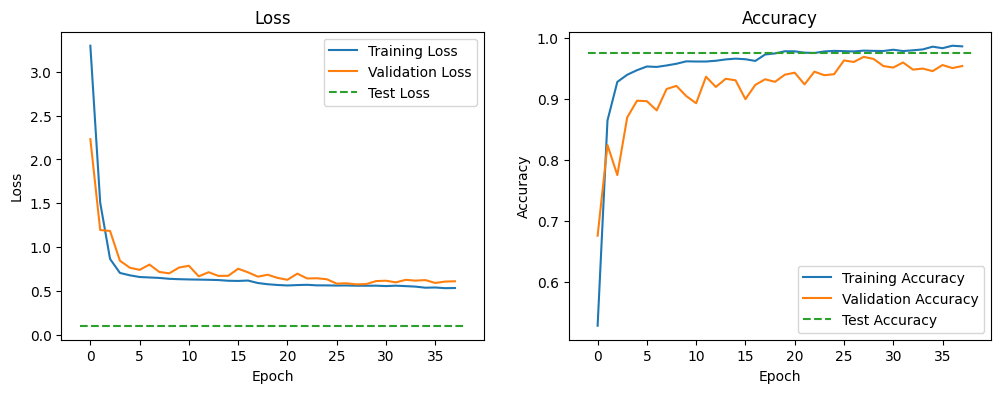

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


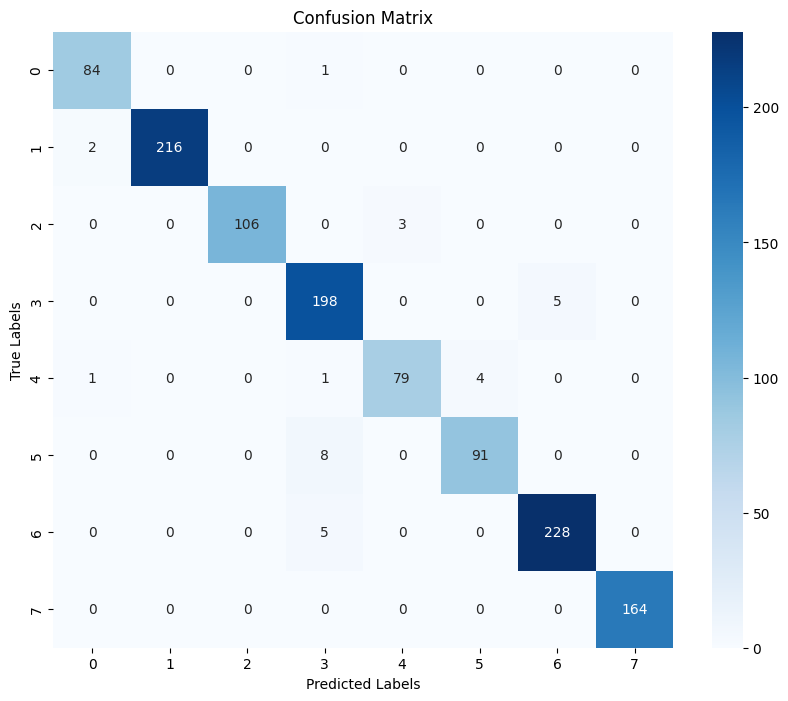

Classification Report:
                       precision    recall  f1-score   support

             Basophil       0.97      0.99      0.98        85
           Eosinophil       1.00      0.99      1.00       218
         Erythroblast       1.00      0.97      0.99       109
Immature granulocytes       0.93      0.98      0.95       203
           Lymphocyte       0.96      0.93      0.95        85
             Monocyte       0.96      0.92      0.94        99
           Neutrophil       0.98      0.98      0.98       233
             Platelet       1.00      1.00      1.00       164

             accuracy                           0.97      1196
            macro avg       0.97      0.97      0.97      1196
         weighted avg       0.98      0.97      0.97      1196



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_training_validation_curves(history, test_loss, test_acc):
    """
    Visualizza le curve di training, validazione e test per loss e metriche.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot della loss
    ax1.plot(history['loss'], label='Training Loss')
    ax1.plot(history['val_loss'], label='Validation Loss')
    ax1.plot([-1, len(history['loss'])], [test_loss, test_loss], '--', label='Test Loss')
    ax1.set_title('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Plot delle metriche
    ax2.plot(history['accuracy'], label='Training Accuracy')
    ax2.plot(history['val_accuracy'], label='Validation Accuracy')
    ax2.plot([-1, len(history['accuracy'])], [test_acc, test_acc], '--', label='Test Accuracy')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.show()


plot_training_validation_curves(history, test_loss, test_accuracy)

# Assuming y_test is your true labels and y_pred is your predicted labels
y_pred = np.argmax(ft_model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(8), yticklabels=range(8))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=[
    "Basophil", "Eosinophil", "Erythroblast", "Immature granulocytes",
    "Lymphocyte", "Monocyte", "Neutrophil", "Platelet"
])
print("Classification Report:")
print(class_report)

## 📊 Prepare Your Submission

To prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:

```python
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""
```

The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.

❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [ ]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('FT_model.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Overwriting model.py


In [ ]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py FT_model.keras

from google.colab import files
files.download(filename)

  adding: model.py (deflated 56%)
  adding: FT_model.keras (deflated 66%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>